# Import the required libraries

In [4]:
import instaloader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the Instagram account credentials

In [5]:
username = "testing_fyp"
password = "Testing@fyp"

# Create an instance of Instaloader class and login to the Instagram account

In [6]:
L = instaloader.Instaloader()
try:
    L.load_session_from_file(username)
    L.context.log("Login successful.")
except FileNotFoundError:
    L.context.log("Session file does not exist yet - Logging in.")
    L.context.log("Logging in to Instagram account...")
    L.context.log("Please wait...")
    L.context.log("This may take a while depending on the number of followers and followees.")
    L.interactive_login(username)

Session file does not exist yet - Logging in.
Logging in to Instagram account...
Please wait...
This may take a while depending on the number of followers and followees.


ConnectionException: Login: Checkpoint required. Point your browser to https://www.instagram.com/challenge/action/AXE3xXOXfFtAPrkJgYOcDNzSJCFQOjxyR5Ik1YDqOMCUNmbwAPXurgYWV1IHncpVQpG6GWE/AfzmS9fsd1BRyZ0LHOiLyFh8bOUVOT9kQ2Bi2K05DOSHv3EVBeweIvhmVgFYNyg8yh02IUDr4RpvnQ/ffc_JCZeSh9aq5phI5xtFV7oH7W42kBPCSYzS2s8OizaNtHnRaC6FPrlVBGQ99LBlob3/ - follow the instructions, then retry.

# Scraping the data from Instagram

In [7]:
# Define the list of accounts to scrape
accounts = [
    {"category": "food", "username": "f_delhite"},
    {"category": "food", "username": "thecoachmarlow"},
    {"category": "food", "username": "londonbylora"},
    {"category": "food", "username": "non_veg_lovers"},
    {"category": "food", "username": "lekhas_feast"},
    {"category": "photography", "username": "natural_photography123_"},
    {"category": "photography", "username": "phot.ographyislife1"},
    {"category": "photography", "username": "mimimandira_clicks"},
    {"category": "photography", "username": "ija_photography"},
    {"category": "photography", "username": "colours.of.india"},
    {"category": "dance", "username": "dance_n_addiction"},
    {"category": "dance", "username": "ishpreet_dang"},
    {"category": "dance", "username": "manoletyet"},
    {"category": "dance", "username": "yashpandyachoreography"},
    {"category": "dance", "username": "sneadesai"},
    {"category": "sports", "username": "stn.daily"},
    {"category": "sports", "username": "judo.olymp_"},
    {"category": "sports", "username": "thesizeup"},
    {"category": "sports", "username": "ball__star"},
    {"category": "sports", "username": "thebsblr"}
]

# Initialize an empty list to store the scraped data
all_data = []

# Loop through each account in the list
for account in accounts:

    # Get the profile of the Instagram account
    profile = instaloader.Profile.from_username(L.context, account['username'])

    # Get the number of followers of the account
    num_followers = profile.followers

    # Get the number of posts of the account
    num_posts = profile.mediacount

    # Get the last 10 posts of the account and store the data in a list of dictionaries
    posts = profile.get_posts()
    posts_data = []
    for post in posts:
        if len(posts_data) >= 10:
            break
        else:
            post_data = {"Category": account['category'],
                         "Username": account['username'],
                         "Time of Posting": post.date.hour, 
                         "Number of Followers": num_followers, 
                         "Number of Posts": num_posts, 
                         "Likes": post.likes}
            posts_data.append(post_data)

    # Add the post data to the list of all data
    all_data.extend(posts_data)

# Convert the list of data into a pandas DataFrame
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)

    Category   Username  Time of Posting  Number of Followers   
0       food  f_delhite                5                59172  \
1       food  f_delhite                5                59172   
2       food  f_delhite                5                59172   
3       food  f_delhite               12                59172   
4       food  f_delhite               12                59172   
..       ...        ...              ...                  ...   
195   sports   thebsblr                0               794346   
196   sports   thebsblr               22               794346   
197   sports   thebsblr               21               794346   
198   sports   thebsblr               20               794346   
199   sports   thebsblr               18               794346   

     Number of Posts   Likes  
0                974  392624  
1                974  819172  
2                974  140320  
3                974     141  
4                974     421  
..               ...     ...  
19

# Describing the data

In [8]:
df.describe()

,Time of Posting,Number of Followers,Number of Posts,Likes
count,200.000000,2.000000e+02,200.000000,2.000000e+02
mean,10.485000,2.426716e+05,2318.200000,7.258253e+04
std,5.407028,3.544240e+05,3444.556825,3.807922e+05
min,0.000000,1.193800e+04,99.000000,-1.000000e+00
25%,6.000000,3.353750e+04,563.500000,3.407500e+02
50%,11.000000,8.828850e+04,1045.500000,1.941500e+03
75%,14.000000,1.698848e+05,1894.000000,6.218000e+03
max,23.000000,1.300333e+06,13478.000000,3.403571e+06


# Visulaization of data

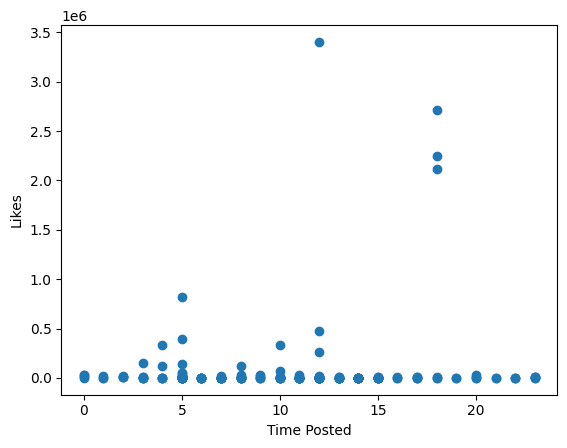

In [9]:
# Create a scatter plot of likes vs. time posted
plt.scatter(df['Time of Posting'], df['Likes'])
plt.xlabel('Time Posted')
plt.ylabel('Likes')
plt.show()

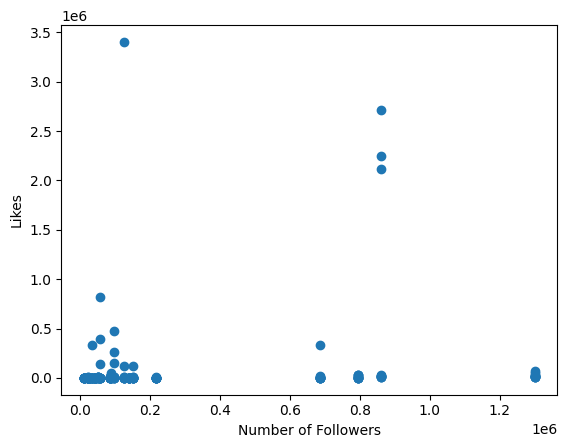

In [10]:
# Create a scatter plot of likes vs. number of followers
plt.scatter(df['Number of Followers'], df['Likes'])
plt.xlabel('Number of Followers')
plt.ylabel('Likes')
plt.show()

# Data Pre-Processing

In [11]:
# Define the features and target variable
X = df[['Category','Time of Posting', 'Number of Followers', 'Number of Posts']]
y = df['Likes']

# Normalize the target
maxvalue = max(y)
y=y/maxvalue

# Define the column transformer to encode the categorical feature
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')

# Fit and transform the column transformer on the feature data
X = ct.fit_transform(X)

# Define the scaler to normalize the feature data
scaler = MaxAbsScaler()

# Fit and transform the scaler on the feature data
X = scaler.fit_transform(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


# Training the ML Regression Model

In [12]:
# Create an instance of the LinearRegression class
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)



LinearRegression()

# Prediction of Values

In [ ]:
import pickle

In [ ]:
# Save the model and column transformer
data = {"model": model, "ct": ct, "scaler": scaler}
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)

# Load the model and column transformer
with open('saved_model.pkl', 'rb') as file:
    data = pickle.load(file)

model_loaded = data["model"]
ct_loaded = data["ct"]
scaler_loaded = data["scaler"]